In [34]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


data = pd.read_csv("Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [35]:
'''for cleaning the data set'''
data = data.dropna()
print("Unique values in mainroad:", data['mainroad'].unique())

Unique values in mainroad: ['yes' 'no']


In [36]:
#Label Encoding
# Convert yes/no columns to 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
data[binary_cols] = data[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

#data['mainroad'] = data['mainroad'].map({'yes': 1, 'no': 0})
print("Unique values in mainroad after encoding:", data['mainroad'].unique())


Unique values in mainroad after encoding: [1 0]


In [37]:
#one hot encoding
print(data['furnishingstatus'].value_counts())

data = pd.get_dummies(data, columns=['furnishingstatus'], prefix='furnishing', dtype=int)
print("\nAfter encoding:")
print("New columns created:", [col for col in data.columns if 'furnishing' in col])


furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

After encoding:
New columns created: ['furnishing_furnished', 'furnishing_semi-furnished', 'furnishing_unfurnished']


In [ ]:
#Feature selection
X = data.drop('price', axis=1)
y = data['price'].values.ravel()

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Missing values in X:", X.isnull().sum().sum())
print("Missing values in y:", pd.isnull(y).sum())

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train Model
model = LinearRegression()
model.fit(X_train, y_train)

#Evaluate Model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


X shape: (545, 14)
y shape: (545,)
Missing values in X: 0
Missing values in y: 0

Model Evaluation:
RMSE: 1324506.96
R² Score: 0.6529


In [40]:
#Feature Importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nTop Features Influencing Price:")
print(importance.head(5))


Top Features Influencing Price:
            Feature   Coefficient
2         bathrooms  1.094445e+06
8   airconditioning  7.914267e+05
7   hotwaterheating  6.846499e+05
10         prefarea  6.298906e+05
3           stories  4.074766e+05



Predicted Price of New House: $8,107,241.60


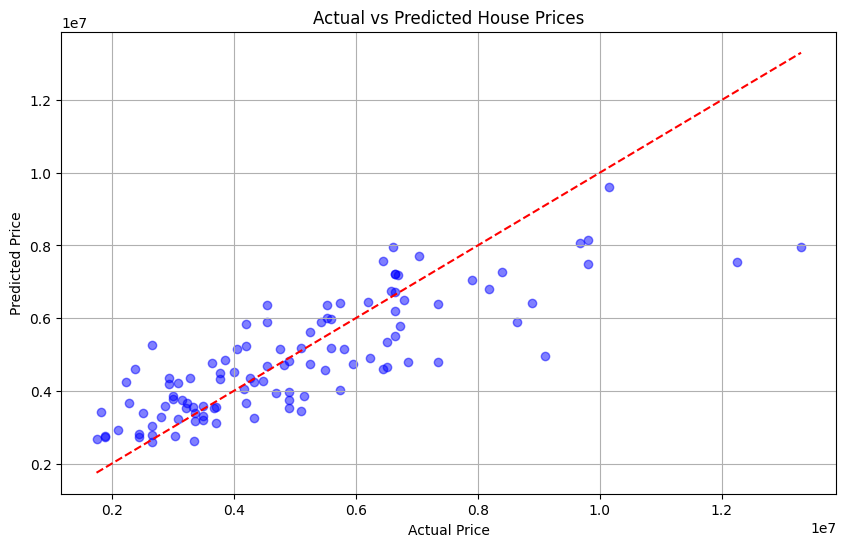

In [ ]:
feature_cols = X.columns

new_house = pd.DataFrame([{
    'area': 3000,
    'bedrooms': 4,
    'bathrooms': 3,
    'stories': 2,
    'mainroad': 1,
    'guestroom': 1,
    'basement': 1,
    'hotwaterheating': 0,
    'airconditioning': 1,
    'parking': 2,
    'prefarea': 1,
    'furnishing_furnished': 0,
    'furnishing_semi-furnished': 1,
    'furnishing_unfurnished': 0
}])

new_house = new_house.reindex(columns=feature_cols, fill_value=0)

predicted_price = model.predict(new_house)[0]
print(f"\nPredicted Price of New House: ${predicted_price:,.2f}")

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()